In [1]:
import warnings
warnings.filterwarnings("ignore")

Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
dataset= pd.read_csv('delivery.csv')
dataset.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [4]:
dataset.shape

(25, 3)

<function matplotlib.pyplot.show(*args, **kw)>

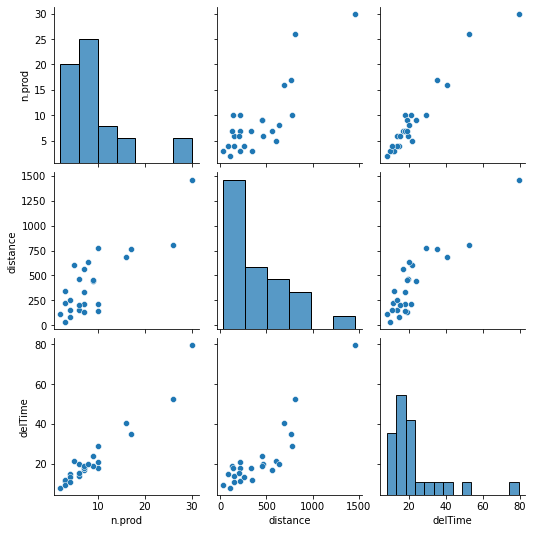

In [5]:
sns.pairplot(dataset)
plt.show

Splitting into test and training set

In [6]:
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20,random_state= 0)

Training the Multiple linear regression model on training set

In [8]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

Predicting the Test set results

In [9]:
Y_pred=mlr.predict(X_test)
np.set_printoptions(precision=2)
print(Y_pred)


[18.63 12.13 41.59 15.09 21.94]


In [10]:
c=mlr.intercept_
print(c)

2.23176234582888


In [11]:
print(mlr.coef_)

[1.66 0.01]


Method 3

In [12]:
res=mlr.predict([[7,330]])
res

array([18.63])

Visualization of Multiple Linear Regression Model

EVALUATION

1.RMSE

In [13]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error=",rmse)

Root Mean Squared Error= 2.9464046358363527


R^2 VALUE

In [14]:
#Method 1
from sklearn.metrics import r2_score
r_squared=r2_score(Y_test,Y_pred)
print("r square value is :",r_squared)

r square value is : 0.8631658854722796


ADJ. R^2 VALUE

In [15]:
#Method1 
adjusted_r_squared= 1 -(1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("adjusted r square value:",adjusted_r_squared)

adjusted r square value: 0.8507264205152141


In [16]:
#Methode2 
n=len(dataset)
p=len(dataset.columns)-1
adj_r=1-(1-r_squared)*(n-1)/(n-p-1)
print("adjusted r squared value is :",adj_r)

adjusted r squared value is : 0.8507264205152141


R-squared and adjusted R-squared using statsmodels

In [17]:
import statsmodels.api as sm
multiple_reg=sm.OLS(Y,X).fit()
multiple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              734.8
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    1.44e-21
Time:                        08:35:56   Log-Likelihood:                         -65.768
No. Observations:                  25   AIC:                                      135.5
Df Residuals:                      23   BIC:                                      138.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7079      0.178      9.621      0.000       1.341       2.075
x2             0.0161      0.004      4.259      0.000       0.008       0.024
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.825
Skew:                          -0.643   Prob(JB):                        0.401
Kurtosis:                       2.687   Cond. No.                         131.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""